In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [23]:
# Load your dataset
df = pd.read_excel(r"E:\Documentos\02_Programming\A-data-driven-approach-to-marking-of-plastic-materials-by-laser-micro-machining\Image processing\Contrast and Histograms\Real DOE\DOE UV results.xlsx")  # Adjust the path to your dataset

# Selecting input features and the target variable
X = df[['Line width', 'Laser power', 'Speed', 'Pulse Frequency']].values
y = df['LDPE black'].values  # Assuming you're optimizing for 'LDPE black'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Define the neural network architecture
model = Sequential([
    Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for a regression output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=10, verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 28ms/step - loss: 1156.0413 - val_loss: 1370.9651
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 1151.3872 - val_loss: 1366.0714
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 1146.7941 - val_loss: 1361.1237
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 1141.8820 - val_loss: 1355.9933
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 1136.9677 - val_loss: 1350.5262
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 1132.0128 - val_loss: 1344.7439
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 1126.5048 - val_loss: 1338.8644
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 1120.8292 - val_loss: 1332.7498
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 1114.8533 - val_loss: 1326.0026
Epoch 10/200
7/7 [==============================] - 0s 10ms/step -

In [25]:

# Define a function to perform gradient ascent
def gradient_ascent(initial_input, model, steps, learning_rate):
    input_var = tf.Variable(initial_input, dtype=tf.float32)
    for step in range(steps):
        with tf.GradientTape() as tape:
            tape.watch(input_var)
            prediction = model(input_var)
        
        # Calculate the gradients of the output w.r.t. the input
        grads = tape.gradient(prediction, input_var)
        
        # Adjust the inputs in the direction of the gradients
        input_var.assign_add(learning_rate * grads)
    
    return input_var.numpy()

# Correcting the input shape
initial_guess_corrected = scaler.transform([[0.04, 60, 200, 30]])  # This results in a shape of (1, 4)

# Now, use the corrected initial guess in the gradient ascent function
optimized_input = gradient_ascent(initial_guess_corrected, model, steps=50, learning_rate=0.01)


# Transform the optimized input back to the original scale
optimized_input_original_scale = scaler.inverse_transform(optimized_input)
print("Optimized Input in Original Scale:", optimized_input_original_scale)

Optimized Input in Original Scale: [[-3.6227919e-02  2.7690525e+01 -3.5025938e+03 -3.0932293e+01]]


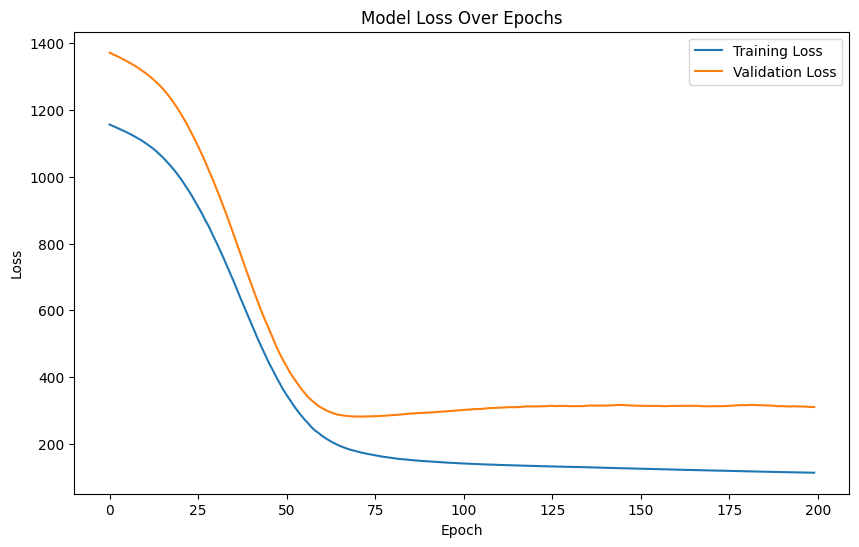

In [26]:
# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculating RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

1/1 [==============================] - 0s 65ms/step
Root Mean Squared Error: 17.63
Mean Absolute Error: 12.69


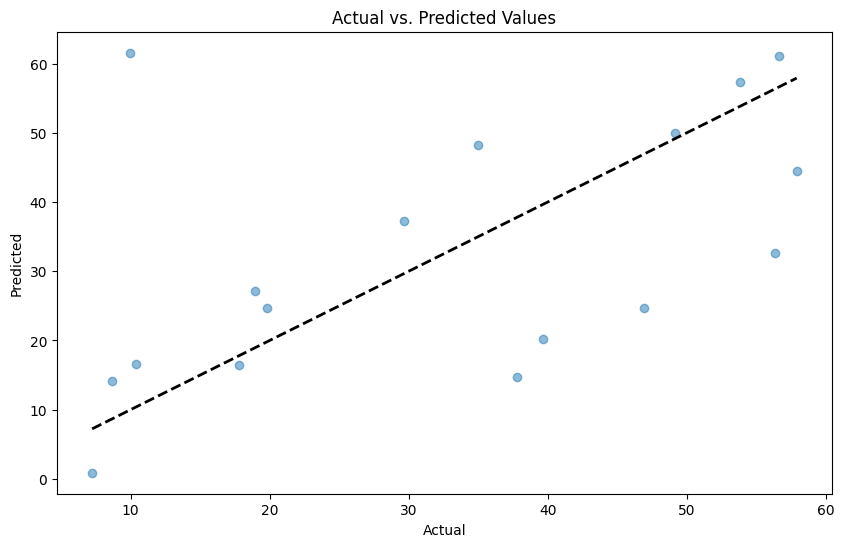

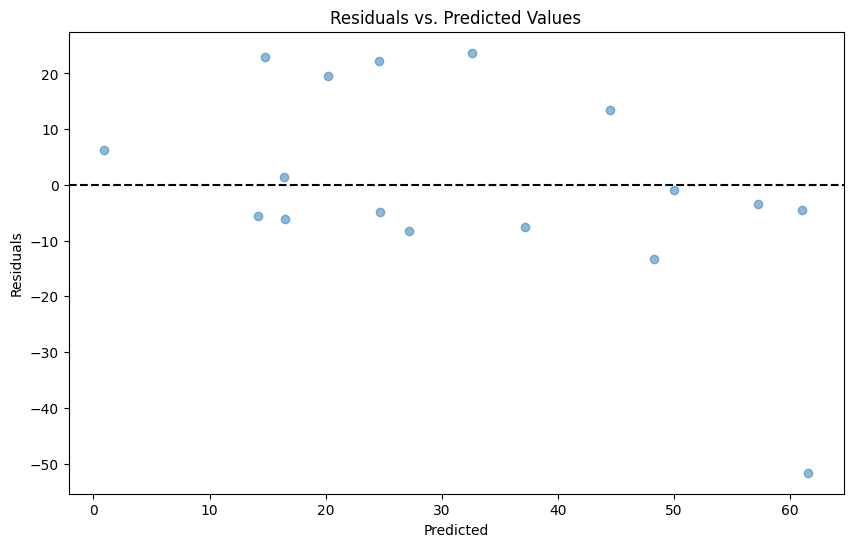

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Optionally, plot the residuals
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()